## EXPLORE CONFIDENCE INTERVALS

### INTRODUCTION

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:

1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using seaborn.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

### Step 1: Imports

#### Import packages

Import pandas and numpy.

In [2]:
import numpy as np
import pandas as pd

#### Import the dataset

In [4]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

### Step 2: Data Exploration

#### Explore your data set

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame

In [6]:
print("use describe() to summarize AQI")
print(aqi.describe(include = "all"))

use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


In [8]:
print("For a more thorough evaluation by state use values_counts()")
print(aqi['state_name'].value_counts())

For a more thorough evaluation by state use values_counts()
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington            

**Question**: What time range does this data cover? --> January 1st 2018

**Question**: What are the minimum and maximum AQI values observed in the dataset? --> 0 - 50

**Question**: Are all the states equally represented in the dataset? --> no

### Step 3: Statistical Tests

#### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [11]:
# Create a list of RRE states

rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]

# Subset aqi to only consider these states

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states

aqi_rre.groupby(['state_name']).agg({"aqi":"mean", "state_name":"count"}) 

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

<Axes: xlabel='state_name', ylabel='aqi'>

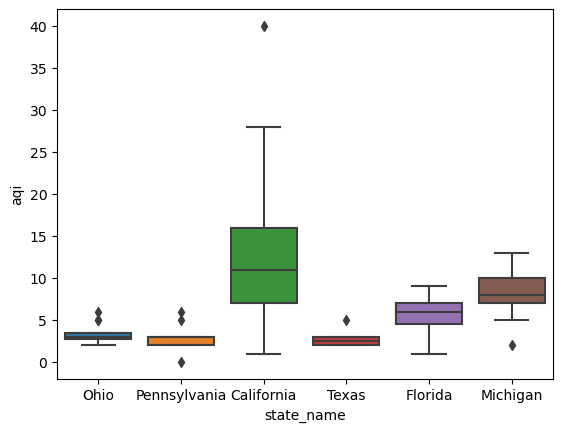

In [12]:
import seaborn as sns

sns.boxplot(x = aqi_rre['state_name'],
           y = aqi_rre['aqi'])

**Question**: Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

Process:

1. Identify the sample statistic
2. Choose the confidence level
3. Find the margin of error
4. Calculate the interval


In [13]:
# Calculate the sample statistic: Mean

aqi_ca = aqi[aqi['state_name'] == 'California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

In [14]:
# Choose the confidence level.

confidence_level = 0.95
confidence_level

0.95

In [ ]:
# Find the margin of error

**margin of error = x * standard erorr **

| Confidence level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |

In [16]:
z_value = 1.96

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print('standard error:')
print(standard_error)

standard error:
0.8987209641127412


In [17]:
# Calculate your margin

margin_of_error = standard_error * z_value
print("Margin of Error:")
print(margin_of_error)

Margin of Error:
1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [18]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

## ALTERNATIVE

Use scipy.stats.norm.interval()

In [21]:
from scipy import stats

stats.norm.interval(confidence = confidence_level,
                   loc = sample_mean,
                   scale = standard_error)

(10.359751399400034, 13.882672843024208)